# INFO8010: Homework 1

In this first homework, you will familiarize yourself with the basics of differentiable programming and the PyTorch framework. At the end of this assignment, you should be able to build and train your own multi-layer perceptron. Although this assignment is optional, we **strongly** advise you to do it as you are expected to be comfortable with PyTorch at the end of this course.

In the following, we provide some code blocks that are already running, along with explanations. You are asked to complete the code blocks in which the `# your code` comment is present. Sometimes, you will also have to motivate why you programmed certain things or guide us quickly through the results you obtained. If this is required you will see the following instruction:

> your discussion

Please note that you will **not** have to handle in any sort of written report by the end of the assignment. We do however expect you to submit the notebook **with the solutions** to the exercises.

## 0. Imports

Our first step is very easy: we simply import the required libraries.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## 1. Tensors and basic operations

Tensors are one of the main ingredients when it comes to modern deep learning frameworks. Almost all deep learning computations can be expressed as tensor operations which make computation fast and efficient, especially on graphics processing units (GPUs). We will now see how to manipulate tensors within the PyTorch framework.

There are many valid definitions for tensors, but to keep it simple you can see them as multi-dimensional arrays. Zero-dimensional tensors are scalars, one-dimensional tensors are vectors, two-dimensional tensors are matrices, etc.

In PyTorch, a tensor is an instance of the class `torch.Tensor`. PyTorch tensors are **very** similar to NumPy arrays.
Almost any operations you could imagine can be performed on tensors (see [API](https://pytorch.org/docs/stable/tensors.html)).

### 1.1 Tensors

There are many ways to [create tensors](https://pytorch.org/docs/stable/tensors.html#torch.Tensor), for instance:

In [6]:
# we can create a tensor from lists
t1 = torch.tensor([[1, 2], [-7, 9]])
print(t1)

# or from numpy arrays
t2 = torch.from_numpy(np.array([[1., 8.], [0., 3.]]))
print(t2)

# or we can create a 2x3x4 tensor filled with zeros
t3 = torch.zeros(2, 3, 4)
print(t3)

tensor([[ 1,  2],
        [-7,  9]])
tensor([[1., 8.],
        [0., 3.]], dtype=torch.float64)
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


As an array may contain different types of data (e.g. float, int, boolean), so can a tensor. Let's check what types of data are in `t1`, `t2` and `t3`:

In [7]:
print(t1.dtype, t2.dtype, t3.dtype, sep='\n')

torch.int64
torch.float64
torch.float32


As expected, PyTorch uses an integer data type to store integer values and a floating-point data type to store real values. However, unlike NumPy, PyTorch uses a **single-precision** floating-point data type (`float32`) by default.

You can convert tensors from one type to another:

In [8]:
print(t1.float(), t2.long(), t3.double(), sep='\n')

tensor([[ 1.,  2.],
        [-7.,  9.]])
tensor([[1, 8],
        [0, 3]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]], dtype=torch.float64)


Another important property of a tensor is its shape. You can use the `.shape` property or `.size()` method to check the dimensions of a tensor. Both return a `torch.Size` object that can be manipulated with its own operations. Most of the time, you will just use `torch.Size` objects as tuples or lists (e.g. to check the size of a tensor along one of its dimension).

In [9]:
# the full shape
print(t1.shape)

# the length of the tensor along its first dimension
print(t2.shape[0])

# the shape of the two last dimensions
print(t3.shape[-2:])

torch.Size([2, 2])
2
torch.Size([3, 4])


### 1.2 Operations

We now consider simple tensor operations on 1D (vectors) and 2D (matrices) tensors. Lets instantiate two vectors with 5 elements and two matrices of respectively 3x5 and 5x5 elements.

In [10]:
v1 = torch.ones(5)
print(v1)

v2 = torch.randn(5)  # standard gaussian
print(v2)

m1 = torch.rand(3, 5)  # [0, 1) uniform
print(m1)

m2 = torch.eye(5)  # identity matrix
print(m2)

tensor([1., 1., 1., 1., 1.])
tensor([-0.5030,  0.9652,  1.2762,  0.2206,  0.5949])
tensor([[0.3746, 0.8828, 0.4458, 0.7234, 0.2294],
        [0.8373, 0.5106, 0.0064, 0.2309, 0.9371],
        [0.3866, 0.5631, 0.3012, 0.0828, 0.5351]])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


The most basic operations are the addition, subtraction, multiplication and division. As in NumPy, but unlike MATLAB, the symbols `+, -, *, /` all perform **element-wise** operations.

In [11]:
# add v1 and v2
v_sum = v1 + v2
print(v_sum)

# subtract v1 from v2
v_sub = v1 - v2
print(v_sub)

# multiply the elements of v1 and v2
v_mul = v1 * v2
print(v_mul)

# divide the elements of v1 by v2
v_div = v1 / v2
print(v_div)

tensor([0.4970, 1.9652, 2.2762, 1.2206, 1.5949])
tensor([ 1.5030,  0.0348, -0.2762,  0.7794,  0.4051])
tensor([-0.5030,  0.9652,  1.2762,  0.2206,  0.5949])
tensor([-1.9880,  1.0360,  0.7836,  4.5327,  1.6810])


When trying to perform an element-wise operation between tensors of different shapes, the tensors are [broadcast](https://numpy.org/doc/stable/user/basics.broadcasting.html) together, if possible. Notably, this allows to add or multiply tensors by scalars.

In [12]:
# add a scalar
print(v1 + 1)

# multiply by scalar
print(v2 * 2)

# broadcast substraction between vector and matrix
print(v2 - m1)

tensor([2., 2., 2., 2., 2.])
tensor([-1.0060,  1.9305,  2.5524,  0.4412,  1.1898])
tensor([[-0.8776,  0.0825,  0.8304, -0.5028,  0.3655],
        [-1.3403,  0.4546,  1.2698, -0.0103, -0.3422],
        [-0.8897,  0.4021,  0.9750,  0.1379,  0.0598]])


Another basic operation with tensors is the inner product, denoted by the symbol `@`.

In [13]:
# scalar product between v1 and v2
print(v1 @ v2)

# matrix-vector product between m1 and v2
print(m1 @ v2)

# matrix-matrix product between m1 and m2
print(m1 @ m2)

tensor(2.5540)
tensor([1.5287, 0.6882, 1.0701])
tensor([[0.3746, 0.8828, 0.4458, 0.7234, 0.2294],
        [0.8373, 0.5106, 0.0064, 0.2309, 0.9371],
        [0.3866, 0.5631, 0.3012, 0.0828, 0.5351]])


#### Aggregation

Common operations are to aggregate the values of a tensor along a dimension into a single value. For instance, computing the sum of the rows of a matrix . A lot of aggregation methods such as `.sum`, `.prod`, `.mean`, `.max`, ... are available.

In [14]:
# sum of rows of m1
print(m1.sum(dim=1))

# mean of columns of m2
print(m2.mean(dim=0))

# prod of the elements of v2
print(v2.prod())

tensor([2.6559, 2.5223, 1.8688])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor(-0.0813)


#### Indexing

Sometimes you would like to extract a sub-tensor from the tensor. This operation is called *slicing*.

In [15]:
# extract elements 0 (included) to 2 (not included)
print(v1[0:2])

# extract all elements but the last
print(v2[:-1])

tensor([1., 1.])
tensor([-0.5030,  0.9652,  1.2762,  0.2206])


You may also extract a subset of the elements by passing a list of indices.

In [16]:
# extract the first, fourth and fifth elements
v2[[0, 3, 4]]

tensor([-0.5030,  0.2206,  0.5949])

Matrices can also be sliced/indexed.

In [17]:
m1[:4, 2:-1]

tensor([[0.4458, 0.7234],
        [0.0064, 0.2309],
        [0.3012, 0.0828]])

#### Squeeze and Unsqueeze

Squeezing removes dimensions of size 1 from tensors. Unsqueezing adds a dimension of size 1.

In [18]:
# before unsqueeze
print(m1.shape)

# after unsqueeze
m1 = m1.unsqueeze(1)
print(m1.shape)

# after squeeze
m1 = m1.squeeze(1)
print(m1.shape)

torch.Size([3, 5])
torch.Size([3, 1, 5])
torch.Size([3, 5])


#### View

Sometimes, tensors don't have the correct shape. For example, you might want to process 3x32x32 images as vectors of 3072 elements. The `.view` method returns a new tensor with the same data, but of a different shape.

In [19]:
images = torch.rand(10, 3, 32, 32)
print(images.shape)

images_as_vectors = images.view(10, -1)
print(images_as_vectors.shape)

torch.Size([10, 3, 32, 32])
torch.Size([10, 3072])


However, both tensors share the same underlying data, meaning that modifying one in-place will also modify the other.

In [20]:
images[0, :] = torch.zeros_like(images[0])
images_as_vectors[0]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

It should be noted that slicing, indexing and squeezing operations actually create views of the tensor instead of making copies of the data. For a complete list of view operations in `torch`, see the [documentation](https://pytorch.org/docs/stable/tensor_view.html).

#### Other primitives

A **lot** of useful primitives are available in `torch`. Notable examples are [exp](https://pytorch.org/docs/stable/generated/torch.exp.html), [log](https://pytorch.org/docs/stable/generated/torch.log.html), [sqrt](https://pytorch.org/docs/stable/generated/torch.sqrt.html), [ceil](https://pytorch.org/docs/stable/generated/torch.ceil.html), [clamp](https://pytorch.org/docs/stable/generated/torch.expand.html), [sort](https://pytorch.org/docs/stable/generated/torch.sort.html), [argmax](https://pytorch.org/docs/stable/generated/torch.argmax.html), [stack](https://pytorch.org/docs/stable/generated/torch.stack.html), [cat](https://pytorch.org/docs/stable/generated/torch.cat.html), [where](https://pytorch.org/docs/stable/generated/torch.where.html) and so on. Always take a look at the [documentation](https://pytorch.org/docs/stable/index.html) before implementing something. And don't forget: Google is your best friend!

### 1.3 Try it yourself!

Create a tensor `samples` with $10^{5}$ i.i.d. normally (mean 5 and standard deviation 2) distributed values.

In [21]:
samples = torch.normal(mean=5, std=2, size=(10**5,)) # API
print(samples)

tensor([4.6886, 5.2641, 4.5207,  ..., 3.6305, 5.1623, 3.2756])


Extract the first 42 elements of `samples`.

In [22]:
print(samples[:42])
print(samples[:42].shape)

tensor([4.6886, 5.2641, 4.5207, 5.7909, 5.0317, 3.7550, 6.6827, 5.8515, 2.7670,
        6.2632, 1.5877, 4.6665, 5.7507, 4.0811, 6.5577, 8.4218, 3.9016, 7.6153,
        4.0617, 8.6193, 3.9079, 4.1905, 5.4407, 8.1571, 5.3212, 3.6890, 6.1446,
        6.6542, 5.8459, 1.8513, 7.4520, 5.3619, 5.9242, 3.3065, 6.9280, 5.2114,
        4.5245, 7.3368, 4.7792, 7.6492, 5.0804, 7.2208])
torch.Size([42])


Extract the last 666 elements of `samples`.

In [23]:
print(samples[-666:])
print(samples[-666:].shape)

tensor([ 9.2913,  6.3401,  2.3236,  3.0145,  4.6193,  5.6571,  1.7861,  2.4019,
         7.3562,  4.3019,  1.9853,  4.2007,  5.4848,  5.9242,  5.6034,  8.9853,
         4.8477,  3.1102,  8.3083,  7.1925,  4.0045,  7.8963,  4.2838,  9.9428,
         6.0840,  5.5725,  9.9901,  8.4512,  4.5438,  8.0985,  6.8875,  6.7344,
         4.8820,  5.7419,  4.2556,  5.0743,  8.2671,  7.2227,  4.7971,  5.6575,
         3.2023,  5.4555,  5.6198,  5.8042,  5.2931,  3.7883,  2.5733,  3.5676,
         4.6751,  3.6162,  6.5624,  6.4276,  3.3985,  7.5234,  2.2218,  7.1295,
         6.3312,  3.8894,  4.3358,  7.8295,  6.1833,  4.3210,  6.2280,  4.3942,
         2.7244,  1.6180,  6.1667,  7.4731,  5.8759,  9.1804,  8.1488,  4.3056,
         4.8877,  7.5177,  3.1853,  8.1618,  7.5678,  7.2759,  6.1951,  3.9684,
         7.4663,  4.6858,  2.2524,  3.3273,  6.0088,  6.1106,  4.2494,  6.9399,
         6.9551,  6.4410,  5.5947,  3.5528,  6.8396,  2.6023,  6.5990,  5.3007,
         7.6236,  5.5375,  4.2190,  4.84

Extract all the elements of `samples` that have an odd index.

In [24]:
print(samples[1::2])

tensor([5.2641, 5.7909, 3.7550,  ..., 2.6612, 3.6305, 3.2756])


Create a view of shape 10x1000x10 of `samples`.

In [25]:
print(samples.view(10, 1000,10))
print(samples.view(10, 1000,10).shape)

tensor([[[ 4.6886,  5.2641,  4.5207,  ...,  5.8515,  2.7670,  6.2632],
         [ 1.5877,  4.6665,  5.7507,  ...,  7.6153,  4.0617,  8.6193],
         [ 3.9079,  4.1905,  5.4407,  ...,  6.6542,  5.8459,  1.8513],
         ...,
         [ 6.9645,  6.3682,  5.2550,  ...,  6.8111,  4.4785,  7.2734],
         [ 4.3511, -0.8259,  6.6583,  ...,  3.1034,  3.5476,  5.2898],
         [ 3.5248,  5.0908,  7.0879,  ...,  3.9417,  7.6638,  4.0770]],

        [[ 4.4146,  4.3409,  6.8534,  ...,  3.7444,  3.4548,  5.4655],
         [ 3.6290,  3.3905,  1.0230,  ...,  9.5174,  4.9984,  7.0035],
         [ 4.7422,  8.2165,  5.5331,  ...,  5.9161,  4.8642,  2.8205],
         ...,
         [ 4.3600,  5.3212,  2.8607,  ...,  6.3683,  2.3163,  3.2207],
         [ 4.8857,  5.8103,  0.5197,  ...,  3.5096,  4.9492,  0.8570],
         [ 6.0601,  7.1960,  3.2945,  ...,  5.7737,  3.7858,  4.3423]],

        [[ 7.8162,  3.2892,  4.1867,  ...,  5.9709,  4.4358,  5.2367],
         [ 4.8079,  1.2902,  6.5477,  ...,  6

Compute the mean of `samples` using a `for` loop:

In [26]:
%%timeit

tot_sum = 0
for i in range(samples.shape[0]):
    tot_sum += samples[i]
mean_value = tot_sum / samples.shape[0]
print(mean_value)

tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0020)
tensor(5.0

Compute the mean and standard deviation of `samples` with the appropriate PyTorch operators:

In [27]:
%%timeit

print(torch.mean(samples))
print(torch.std(samples))

tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0020)
tensor(1.9940)
tensor(5.0

What do you observe when you compare the running time of the two code snippets?

> Using PyTorch operators of mean and standard deviation is much faster than the loop-based approach

Compute the absolute-value ($L_1$) and Euclidean ($L_2$) norms of `samples`, without loops.

In [28]:
print(torch.norm(samples, p=1)) # API
print(torch.norm(samples, p=2)) # API

tensor(500965.9062)
tensor(1702.8215)


Extract the first and last 13 elements of `samples` as two distinct vectors and compute their [outer product](https://en.wikipedia.org/wiki/Outer_product) matrix, without loops.

In [29]:
outer_matrix = torch.outer(samples[:13], samples[-13:]) # API
print(outer_matrix)

tensor([[34.4768, 27.3164, 18.1825, 38.9345, 27.3019, 21.7277, 37.6097, 38.6965,
         12.4770, 41.3577, 17.0217, 24.2038, 15.3577],
        [38.7086, 30.6693, 20.4143, 43.7135, 30.6531, 24.3946, 42.2261, 43.4463,
         14.0085, 46.4341, 19.1110, 27.1747, 17.2428],
        [33.2423, 26.3384, 17.5315, 37.5405, 26.3244, 20.9497, 36.2631, 37.3110,
         12.0303, 39.8769, 16.4122, 23.3372, 14.8078],
        [42.5825, 33.7386, 22.4573, 48.0883, 33.7208, 26.8360, 46.4519, 47.7943,
         15.4104, 51.0812, 21.0236, 29.8942, 18.9684],
        [37.0000, 29.3156, 19.5133, 41.7840, 29.3001, 23.3178, 40.3622, 41.5286,
         13.3902, 44.3846, 18.2675, 25.9752, 16.4817],
        [27.6119, 21.8772, 14.5621, 31.1820, 21.8656, 17.4013, 30.1210, 30.9914,
          9.9926, 33.1227, 13.6324, 19.3844, 12.2997],
        [49.1403, 38.9345, 25.9159, 55.4940, 38.9139, 30.9688, 53.6057, 55.1548,
         17.7837, 58.9479, 24.2613, 34.4981, 21.8896],
        [43.0286, 34.0922, 22.6927, 48.5921, 34.

Extract the diagonal of this matrix.

In [30]:
print(torch.diag(outer_matrix)) # API

tensor([34.4768, 30.6693, 17.5315, 48.0883, 29.3001, 17.4013, 53.6057, 48.2951,
         7.3634, 55.2475,  5.7642, 24.0897, 18.8368])


Trace the curve defined by the coordinates

$$x(t) = 16 \sin(t)^3$$

$$y(t) = 13 \cos(t) - 5 \cos(2t) - 2 \cos(3t) - \cos(4t)$$

for $t \in [0, 2\pi[$.

You can use `np.pi` for the value of $\pi$ and the `matplotlib` package to plot the curve.

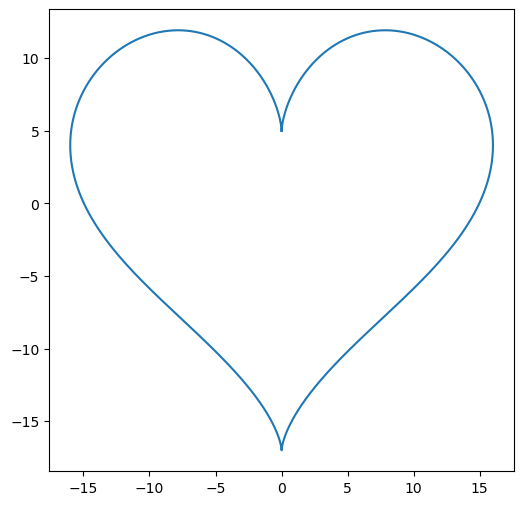

In [31]:
# Generate points between 0 and 2*pi
t = torch.linspace(0, 2 * np.pi, steps=1000)

# Compute x and y
x = 16 * torch.pow(torch.sin(t), 3)
y = 13 * torch.cos(t) - 5 * torch.cos(2*t) - 2 * torch.cos(3*t) - torch.cos(4*t)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.show()

You can now send the result to your crush ;)

## 2. The autograd package

The autograd package is what really makes PyTorch different from other algebraic language/libraries such as MATLAB or NumPy. Whenever you make operations in PyTorch, it will create a computation graph that can later be used to compute derivatives of the output quantities with respect to the input or other intermediate computation steps. 

The official documentation says

> `torch.autograd` provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions. It requires minimal changes to the existing code - you only need to declare tensors for which gradients should be computed with the `requires_grad=True` keyword.

For more information about autograd you can check this short [tutorial](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) and the [documentation](https://pytorch.org/docs/stable/autograd.html).

### 2.1 A guided tour

Let's see how autograd may be used to compute the derivative(s) of the following function.

In [32]:
def f(x):
    return x**2 + 2 * x - 0.5 * torch.sin(x * 3)

def f_prime(x):  # f'
    return 2 * x + 2 - 1.5 * torch.cos(x * 3)

def f_pprime(x):  # f''
    return 2 + 4.5 * torch.sin(x * 3)

In [33]:
x = torch.randn(1, requires_grad=True)  # without requires_grad, the computation graph is not created
print(x)

y = f(x)
print(y)

dy = torch.autograd.grad(y, x, create_graph=True)[0]  # create_graph is necessary for higher-order derivative
print(dy, f_prime(x))

ddy = torch.autograd.grad(dy, x)[0]
print(ddy, f_pprime(x))

tensor([1.1140], requires_grad=True)
tensor([3.5686], grad_fn=<SubBackward0>)
tensor([5.6980], grad_fn=<AddBackward0>) tensor([5.6980], grad_fn=<SubBackward0>)
tensor([1.1041]) tensor([1.1041], grad_fn=<AddBackward0>)


As expected, autograd is able to compute gradients automatically. We can exploit this to perform **gradient descent** with parametric approximators. Let's approximate the function `f` using a polynomial.

In [34]:
# learning set
x = torch.linspace(-3, 3, 1000)
y = f(x)

# parametric approximator (polynomial of degree 3)
def approximator(w, x):
    return torch.stack((torch.ones_like(x), x, x**2, x**3), dim=-1) @ w

# initialize parameters at random
w = torch.randn(4, requires_grad=True)

Let's take a look at what happens before training

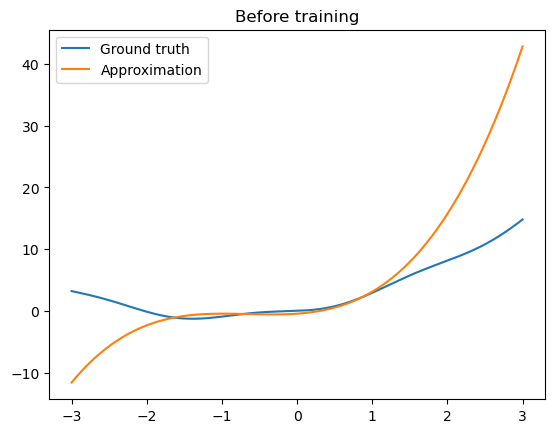

In [35]:
plt.title('Before training')
plt.plot(x, y, label='Ground truth')
plt.plot(x, approximator(w, x).detach(), label='Approximation')
plt.legend()
plt.show()

We perform gradient descent on the mean squared error (MSE) loss function in order to fit the learning set.

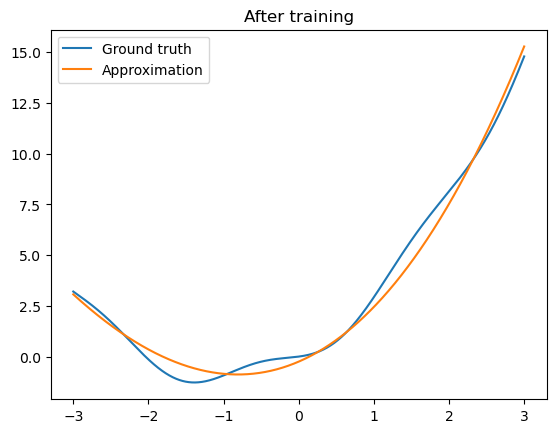

In [36]:
lr = .001  # learning rate

for i in range(1000):
    y_pred = approximator(w, x)
    mse = torch.mean((y - y_pred)**2)  # mean squared error
    grad = torch.autograd.grad(mse, w)[0]
    
    with torch.no_grad():
        w -= lr * grad  # gradient descent update

plt.title('After training')
plt.plot(x, y, label='Ground truth')
plt.plot(x, approximator(w, x).detach(), label='Approximation')
plt.legend()
plt.show()

If the approximator became larger, calling the `torch.autograd.grad` method with all parameter tensors would become quite cumbersome. Fortunately, PyTorch provides the `.backward()` method to acumulate (in the `.grad` property) the gradient values in **all** tensors that are in the computation graph. Later on in this notebook we will see how this, together with `Optimizer` objects, makes gradient descent very simple.

In [37]:
x = torch.rand(5)
w = torch.rand(5, requires_grad=True)
y = w @ x
y.backward()

print(x, w.grad, sep='\n')

tensor([0.4687, 0.1631, 0.6637, 0.3280, 0.4924])
tensor([0.4687, 0.1631, 0.6637, 0.3280, 0.4924])


Importantly, the construction of the computation graphs is expensive and memory consuming. If some computations do not use the gradients, like evaluating an approximator or updating the parameters, one can disable the creation of the computation graph with the `torch.no_grad()` context.

In [38]:
w = torch.rand(100, 100, requires_grad=True)
x = torch.rand(100)

%timeit w @ x

with torch.no_grad():
    %timeit w @ x

1.99 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.3 µs ± 37.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### 2.2 Try it yourself!

We would like you to perform the same kind of curve fitting that we did a few cells above, but this time we want to use the `.backward()` method instead of `torch.autograd.grad`. Remember that PyTorch will keep **accumulating** the gradient values in the `.grad` property of each tensor, i.e. the values are not replaced but added together after each backward pass. Fortunately, you can reset the values of the gradient to 0 with the `.zero_()` in-place method (e.g. `w.grad.zero_()`). To make your life easier, you can start from the learning loop three cells above, but be careful to re-initialize the parameters at random before training and to not use the `torch.autograd.grad` function.

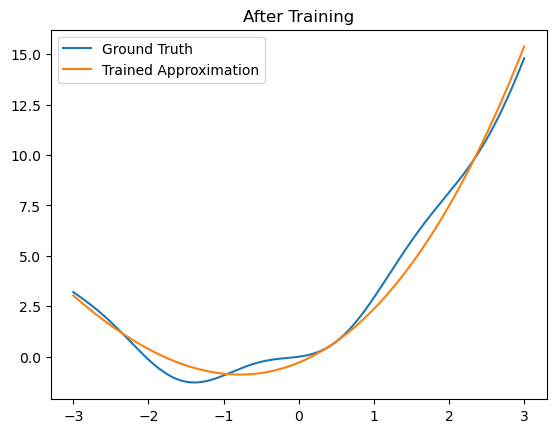

In [39]:
# Generate training data
x = torch.linspace(-3, 3, 1000)
y = f(x)

w = torch.randn(4, requires_grad=True)

lr = 0.001  # learning rate
num_epochs = 1000  # mumber of iterations

for i in range(num_epochs):
    y_pred = approximator(w, x)
    mse = torch.mean((y - y_pred)**2)  # mean squared error
    mse.backward()  # compute gradients

    with torch.no_grad():
        w -= lr * w.grad # gradient descent update
    
    w.grad.zero_() # reset gradients to zero

# Plot
plt.title('After Training')
plt.plot(x, y, label='Ground Truth')
plt.plot(x, approximator(w, x).detach(), label='Trained Approximation')
plt.legend()
plt.show()

## 3. The `torch.nn` and `torch.optim` modules

You should now be able to define your own neural network and train it with tensorial operations and the autograd package. However this would require you to explicitely define every operation in the neural network and to keep track of all the parameters for performing gradient descent. Fortunately, PyTorch provides the `torch.nn` and `torch.optim` packages which implement everything you need to define and train a neural network efficiently.

In [40]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### `nn.functional`

The `torch.nn.functional` (imported as `F` in this notebook) module implements many predefined functions which should simplify your life for building your own neural networks. The complete list can be accessed [here](https://pytorch.org/docs/stable/nn.functional.html). Let's play with some activation functions.

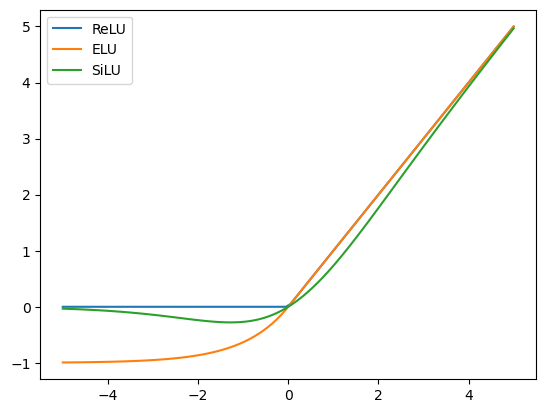

In [41]:
x = torch.linspace(-5, 5, 100)

plt.plot(x, F.relu(x), label='ReLU')
plt.plot(x, F.elu(x), label='ELU')
plt.plot(x, F.silu(x), label='SiLU')
plt.legend()
plt.show()

#### `nn.Module`

PyTorch provides a very important base class named `nn.Module`. This class is used to build complex neural networks. In fact any class which inherits from it will automatically keep track of its parameters. To define your own `nn.Module` subclass you only need to implement the `__init__` constructor and the `forward` function. Let's see an example:

In [42]:
# we create a class 'SimpleParametricModel' which inherits from nn.Module
class SimpleParametricModel(nn.Module):
    def __init__(self):
        # nn.Module's constructor has to be called BEFORE adding any sub-modules
        super().__init__()
        
        # we add a linear layer to our module, which is itself a module
        self.linear = nn.Linear(in_features=3, out_features=1, bias=True)
        
        # we add an activation function to our module
        self.activation = nn.ReLU()
        
    # we define the forward pass
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

We can now create an instance of the `SimpleParametricModel` class and have a look at it.

In [43]:
model = SimpleParametricModel()
print(model)

SimpleParametricModel(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (activation): ReLU()
)


We observe that the two components are correctly registered. We can also inspect the parameters of our model with the `.parameters()` or `.state_dict()` methods.

In [44]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.4606, -0.1213, -0.5131]], requires_grad=True)
Parameter containing:
tensor([0.3889], requires_grad=True)


In [45]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.4606, -0.1213, -0.5131]])),
             ('linear.bias', tensor([0.3889]))])

As expected, the parameters of the linear layer are considered as parameters of the model itself.

PyTorch implements many components that are commonly used in neural networks such as convolutions, linear layers, normalizations and activations. Most of them are available as ready-to-use modules in `torch.nn` (imported as `nn` in this notebook).

Let's build a simple multi-layer perceptron (MLP) with two hidden layers and a ReLU activation function.

In [46]:
class TwoLayerMLP(nn.Module):
    def __init__(self, input_features, output_features, hidden_features=16):
        super().__init__()
        
        self.l1 = nn.Linear(input_features, hidden_features)
        self.l2 = nn.Linear(hidden_features, hidden_features)
        self.l3 = nn.Linear(hidden_features, output_features)
        
        self.activation = nn.ReLU()

    def forward(self, x):
        h1 = self.activation(self.l1(x))
        h2 = self.activation(self.l2(h1))
        y = self.l3(h2)
        return y

# instantiate the network to have 3 input features and 1 output feature (and 16 hidden features)
network = TwoLayerMLP(3, 1)
print(network)

TwoLayerMLP(
  (l1): Linear(in_features=3, out_features=16, bias=True)
  (l2): Linear(in_features=16, out_features=16, bias=True)
  (l3): Linear(in_features=16, out_features=1, bias=True)
  (activation): ReLU()
)


In [47]:
# we usually give batches of values to networks to take advantage of parallelism
# here the batch size is 32
x = torch.rand(8, 3)

# call network.forward under the hood
y = network(x)

print(x, y, sep='\n')

tensor([[0.3565, 0.8579, 0.4717],
        [0.8254, 0.4635, 0.2798],
        [0.2463, 0.8888, 0.0405],
        [0.1571, 0.4459, 0.0555],
        [0.7418, 0.8067, 0.3061],
        [0.1904, 0.5655, 0.6573],
        [0.8973, 0.7404, 0.5612],
        [0.8089, 0.5437, 0.3295]])
tensor([[-0.0036],
        [-0.0275],
        [-0.0159],
        [-0.0199],
        [-0.0218],
        [-0.0031],
        [-0.0205],
        [-0.0297]], grad_fn=<AddmmBackward0>)


#### `nn.Sequential`

Writing the forward pass can become cumbersome and dirty if you have a large number of sequential layers. For that kind of networks, you can use `nn.Sequential` as parent instead of `nn.Module`, which calls the layers sequentially within its forward pass.

In [48]:
class ElegantTwoLayerMLP(nn.Sequential):
    def __init__(self, input_features, output_features, hidden_features=16):
        super().__init__(
            nn.Linear(input_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, output_features),
        )

#  instantiate the network to have 1 input feature and 1 output feature    
network = ElegantTwoLayerMLP(1, 1)
print(network)

ElegantTwoLayerMLP(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)


#### Optimizers

You should now be able to define any kind of neural network you like. However if you want to optimize it you would still need to iterate through all the parameters to perform a gradient descent step. Fortunately, `torch.nn.optim` (imported as `optim`) implements classes that handle that for you! For example, let's say you would like to learn the function $f(x) = x^2$ with the previous neural network, using a MSE loss (often called the criterion) and stochastic gradient descent (SGD):

In [49]:
def f(x):
    return x**2

# we use the MSE loss as criterion
criterion = nn.MSELoss()

# we create an instance of the SGD class that will make the updates for us
optimizer = optim.SGD(params=network.parameters(), lr=.01)

# Let's do some learning steps with randomly generated x values:
for i in range(1000):
    x = torch.randn(100, 1)
    y = f(x)
    y_pred = network(x)
    
    # we set all gradient values to 0
    optimizer.zero_grad()
    
    # we compute the loss
    loss = criterion(y_pred, y)
    
    # we perform the backward pass to accumulate the gradients
    loss.backward()
    
    # we update the parameters
    optimizer.step()

Let's check the results.

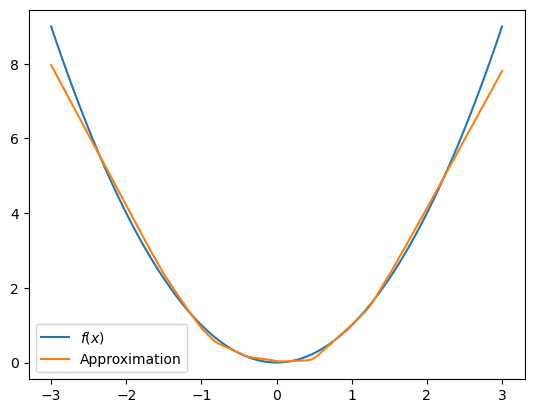

In [50]:
x = torch.linspace(-3, 3, 100).unsqueeze(1)

with torch.no_grad():
    y = network(x)

plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, y, label='Approximation')
plt.legend()
plt.show()

## 4. Training our first neural network classifier

We now have all the necessary knowledge to build and train our very first neural network on a simple binary classification task. To do this we will start by importing a toy example dataset from the `sklearn` library, and then create and use the resulting splits for training.

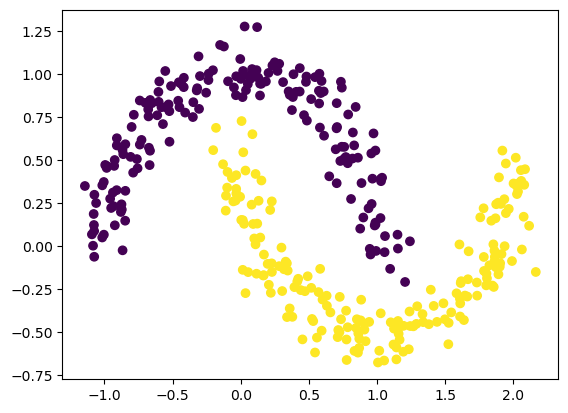

In [51]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, Y = make_moons(500, noise=0.1)  # create artificial data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=73)  # create splits

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)  # visualize the training data
plt.show()

When we train a neural network in PyTorch, no matter how complex the model is, we always go through a training loop. In this loop we feed the data to the model and get its predictions. We then compare the predictions of the network to the ground truth and adjust the parameters of the model by performing gradient descent. We have already seen all the components that are necessary for going through this process, so the only thing that remains to be done is to put all the pieces of this notebook together and train our **first awesome neural network!**

During the training stage we would like to keep track whether our model will improve over the different iterations. It is therefore good practice to monitor whether the loss we are minimizing decreases over time, and whether the overall performance of the model increases the more training iterations we perform. Remember that one of the key components of PyTorch are tensors, and we might not always have the data coming in this specific format. It is therefore necessary to convert it if needed.

Once the data is in an appropriate format it can be given to the model, and we can obtain its predictions. This is what we usually call the **forward pass**. Once we obtain our predictions, we can compare how close they are to what we would like the network to predict: to do this we feed our predictions together with the true labels through the loss function we are minimizing. At its early training stages the network will perform poorly, but it will improve as its weights/parameters are updated by gradient descent. We can do this very easily by obtaining the gradients of the parameters with respect to the loss function we are minimizing (**backward pass**) and adjusting these weights with the optimizer we defined previously.

Once all of this is done we can measure the performance of our model, which in this case will be reflected by its accuracy in classifying the synthetic dataset we created beforehand. 

In [52]:
net = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid(),
)
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=.01)

In [53]:
train_loss = []  # where we keep track of the loss
train_accuracy = []  # where we keep track of the accuracy of the model
iters = 128  # number of training iterations

X_train_t = torch.from_numpy(X_train).float()
Y_train_t = torch.from_numpy(Y_train).float()

for i in range(iters):
    y_pred = net(X_train_t)  # forward pass
    y_pred = y_pred.squeeze(-1)  # transform the 1-element vectors into scalars

    optimizer.zero_grad() # reset the gradients to 0
    loss = criterion(y_pred, Y_train_t)  # compute the loss
    loss.backward()  # obtain the gradients with respect to the loss
    optimizer.step()  # perform one step of gradient descent
    
    with torch.no_grad():
        y_pred_class = y_pred > 0.5  # we assign a label (0 or 1) based on the network's prediction
        accuracy = (Y_train_t == y_pred_class).float().mean()  # compute accuracy
    
    train_accuracy.append(accuracy.item())
    train_loss.append(loss.item())

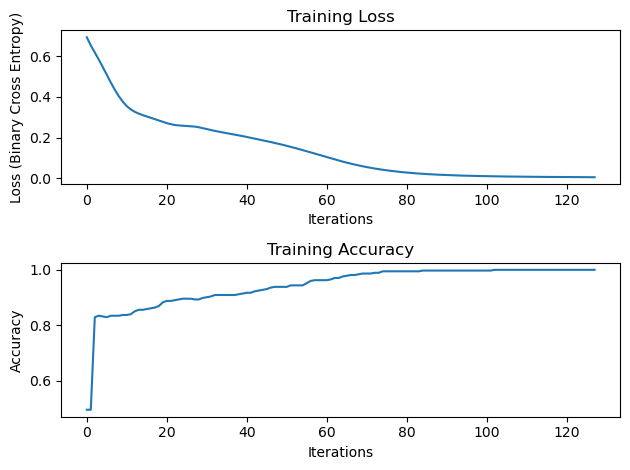

In [54]:
fig, axs = plt.subplots(2, 1)

axs[0].set_title('Training Loss')
axs[0].plot(train_loss)
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss (Binary Cross Entropy)')

axs[1].set_title('Training Accuracy')
axs[1].plot(train_accuracy)
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

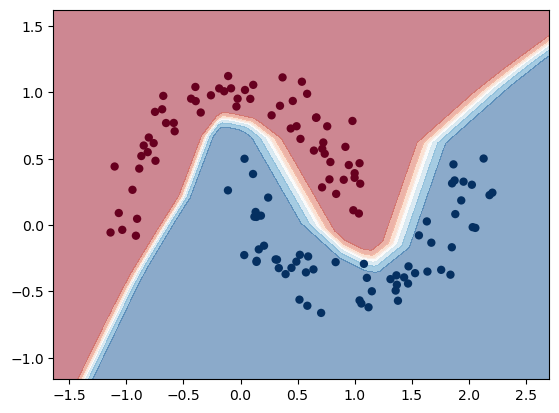

In [55]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min(), X[:,0].max()
    ymin, ymax = X[:,1].min(), X[:,1].max()
    steps = 1000
    x_span = np.linspace(xmin - .5, xmax + .5, steps)
    y_span = np.linspace(ymin - .5, ymax + .5, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    with torch.no_grad():
        grid = np.stack([xx, yy], axis=-1)
        grid = torch.from_numpy(grid).float()
        pred = model(grid).squeeze(-1)

    # Plot decision boundary in region of interest
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, pred, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model(torch.from_numpy(X).float())
    ax.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=cmap, lw=0)

    return fig

fig = plot_decision_boundary(X_test, Y_test, net, cmap = 'RdBu')

### 4.1 Discuss the bugs

After actively following the theoretical lectures of professor Louppe, our favourite Italian student Al Dente remembered that a common loss function one can use when dealing with classification problems is the Cross-Entropy loss. However after implementing it in PyTorch, Al was disappointed because his code was not working.

What do you think are the causes of the bug(s)? Maybe, first check the documentation of [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). Briefly discuss your ideas and **bonus** can you come up with a solution?

In [56]:
net = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.ELU(),
    nn.Linear(32, 32),
    nn.ELU(),
    nn.Linear(32, 1),
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

train_loss = []
train_accuracy = []
iters = 420

X_train_t = torch.from_numpy(X_train).float()
Y_train_t = torch.from_numpy(Y_train).float()

for i in range(iters):
    y_pred = net(X_train_t)
    y_pred = y_pred.squeeze(-1)

    loss = criterion(y_pred, Y_train_t)
    loss.backward()
    optimizer.step()

In [57]:
net = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.ELU(),
    nn.Linear(32, 32),
    nn.ELU(),
    nn.Linear(32, 1),
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

train_loss = []
train_accuracy = []
iters = 420

X_train_t = torch.from_numpy(X_train).float()
Y_train_t = torch.from_numpy(Y_train).float()

for i in range(iters):
    y_pred = net(X_train_t)
    print(y_pred)
    y_pred = y_pred.squeeze(-1)
    print(y_pred)

    loss = criterion(y_pred, Y_train_t)
    loss.backward()
    optimizer.step()

tensor([[0.1215],
        [0.1402],
        [0.1321],
        [0.0935],
        [0.1714],
        [0.1637],
        [0.1154],
        [0.1788],
        [0.1174],
        [0.1200],
        [0.1558],
        [0.1181],
        [0.1670],
        [0.1144],
        [0.0756],
        [0.1673],
        [0.1689],
        [0.1551],
        [0.1491],
        [0.1761],
        [0.1468],
        [0.1575],
        [0.1524],
        [0.1843],
        [0.0904],
        [0.1642],
        [0.1744],
        [0.1652],
        [0.1778],
        [0.1804],
        [0.1267],
        [0.1161],
        [0.1280],
        [0.1617],
        [0.1065],
        [0.1546],
        [0.1690],
        [0.1784],
        [0.1930],
        [0.1429],
        [0.1445],
        [0.1367],
        [0.1548],
        [0.1157],
        [0.1471],
        [0.1757],
        [0.1408],
        [0.1241],
        [0.1184],
        [0.1421],
        [0.1219],
        [0.1701],
        [0.1290],
        [0.1220],
        [0.1854],
        [0

**Problem:**
- At first, he applied `CrossEntropyLoss()` for this binary classification problem, so it leads to some issues according to the documentation for this Pytorch function.

    - `CrossEntropyLoss()` requires a output layer with at least 2 neurons (each one represents for one class). However, the provided implementation only had 1 neuron at the output layer.
    - `CrossEntropyLoss()` also requires integer label, while the implementation applied floating type.

- On the other hand, his implementation also missed `optimizer.zero_grad()` before `loss.backward()`, which leads to incorrect weight updates, causing poor convergence. Without resetting gradients, PyTorch accumulates gradients over iterations.

**Solutions:** There are 2 options to handle those issues.
- The 1st solution is using `BCELoss()` with an addtional activation layer of Sigmod (to get the probability) instead of `CrossEntropyLoss()`. This allows an minimum modification, where we could keep the original of only one output neuron, and also keep labels as float. `CrossEntropyLoss()` applies Softmax function automatically.
- The 2nd solution is keeping `CrossEntropyLoss()` with some modifications. Those are changing output layer from 1 to 2 neurons, convert labels to integers.
- Both of them also need to add `optimizer.zero_grad()` before `loss.backward()`

In [58]:
# Solution 1: Using BCELoss and sigmoid activation
net = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.ELU(),
    nn.Linear(32, 32),
    nn.ELU(),
    nn.Linear(32, 1),
    nn.Sigmoid(),  # sigmoid activation to get probability
)

criterion = nn.BCELoss()  # use binary cross-entropy loss
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

train_loss = []
train_accuracy = []
iters = 420

X_train_t = torch.from_numpy(X_train).float()
Y_train_t = torch.from_numpy(Y_train).float()

for i in range(iters):
    y_pred = net(X_train_t)
    # print(y_pred)
    y_pred = y_pred.squeeze(-1)
    # print(y_pred)

    optimizer.zero_grad()  # reset gradients

    loss = criterion(y_pred, Y_train_t)
    loss.backward()
    optimizer.step()

In [59]:
# Solution 2: Keep the CrossEntropyLoss
net = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.ELU(),
    nn.Linear(32, 32),
    nn.ELU(),
    nn.Linear(32, 2),  # 2 output nodes for multi-class classification
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

train_loss = []
train_accuracy = []
iters = 420

X_train_t = torch.from_numpy(X_train).float()
Y_train_t = torch.from_numpy(Y_train).long()  # convert targets to integers

for i in range(iters):
    y_pred = net(X_train_t)
    # print(y_pred)

    optimizer.zero_grad()  # reset gradients
    loss = criterion(y_pred, Y_train_t)
    loss.backward()
    optimizer.step()

### 4.2 Try it yourself!

Now try to play around with the neural network yourself: you are free to experiment with whatever you think is best exploring. Your goal is to come up with three modifications to the provided network architecture and to compare the performance of your modified models. As potential modifications you could experiment with changing the depth or width of the model, modifying the activation function, learning rate, optimizer, etc.

Report your results with some appropriate plots and with a brief presentation of what you observe.

#### Baseline model

In [60]:
def train_model(model, optimizer, iters=128):
    criterion = nn.BCELoss()
    train_loss, train_acc = [], []
    test_loss, test_acc = [], []

    X_train_t = torch.from_numpy(X_train).float()
    Y_train_t = torch.from_numpy(Y_train).float()


    for i in range(iters):
        y_pred = model(X_train_t)
        y_pred = y_pred.squeeze(-1)

        loss = criterion(y_pred, Y_train_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute accuracy
        with torch.no_grad():
            y_pred_class = y_pred > 0.5
            accuracy = (Y_train_t == y_pred_class).float().mean()

        train_loss.append(loss.item())
        train_acc.append(accuracy.item())

    return train_loss, train_acc

In [61]:
def plot_training_metrics(train_loss, train_accuracy):
    fig, axs = plt.subplots(2, 1, figsize=(6, 4))
    
    axs[0].set_title('Training Loss')
    axs[0].plot(train_loss, label='Loss')
    axs[0].set_xlabel('Iterations')
    axs[0].set_ylabel('Loss (Binary Cross Entropy)')
    # axs[0].legend()
    
    axs[1].set_title('Training Accuracy')
    axs[1].plot(train_accuracy, label='Accuracy')
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('Accuracy')
    # axs[1].legend()
    
    plt.tight_layout()
    plt.show()

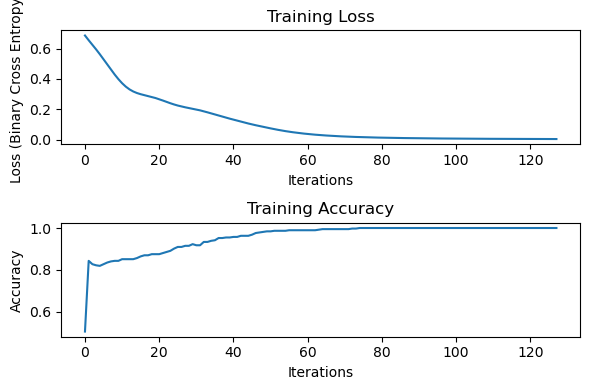

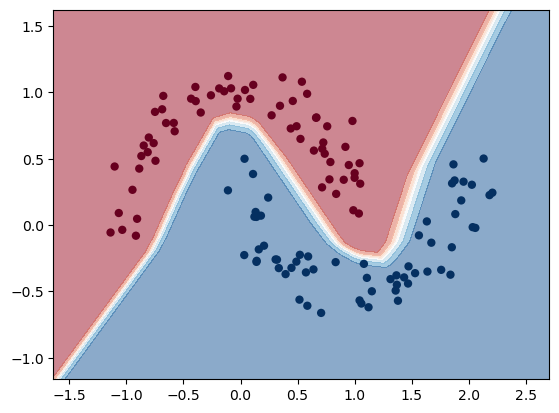

In [62]:
# Baseline model
net_baseline = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid(),
)

# criterion_baseline = nn.BCELoss()
optimizer_baseline = optim.Adam(net_baseline.parameters(), lr=0.01)

train_loss_baseline, train_acc_baseline = train_model(net_baseline, optimizer_baseline)
plot_training_metrics(train_loss_baseline, train_acc_baseline)
fig_base_line = plot_decision_boundary(X_test, Y_test, net_baseline, cmap = 'RdBu')

**Observation:** Baseline model
- Training loss and accuracy:
    - Loss decreases steadily and approaches zero after around 70 iterations.
    - Accuracy shares the opposite trend with reaching 1.00 around 70 iterations.
- Decision boundary:
    - The decision boundary is well-defined and captures the non-linear nature of the dataset.
    - The model effectively separates the two classes.

#### Model 1: Increase the depth of the network

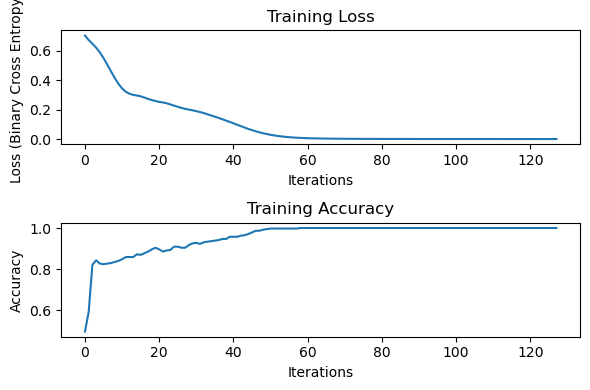

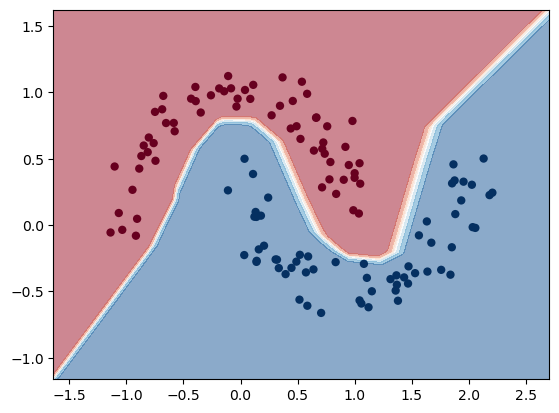

In [63]:
# Model 1: Change the depth of the network (adding layer(s))
net_1 = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid(),
)

optimizer_1 = optim.Adam(net_1.parameters(), lr=0.01)

train_loss_1, train_acc_1 = train_model(net_1, optimizer_1)
plot_training_metrics(train_loss_1, train_acc_1)
fig_1 = plot_decision_boundary(X_test, Y_test, net_1, cmap = 'RdBu')

**Observation:** Increase the depth of the network
- Training loss & accuracy
    - Loss decreases smoothly and reaches near zero after ~40 iterations, lower than baseline model.
- Decision boundary
    - The decision boundary is sharp and well-defined.
    - In comparison with baseline model, this similar shape to the baseline model, but provides slightly smoother transitions between the two regions.
- A deeper network could improve generalization.

#### Model 2: Change the activation function (Tanh)

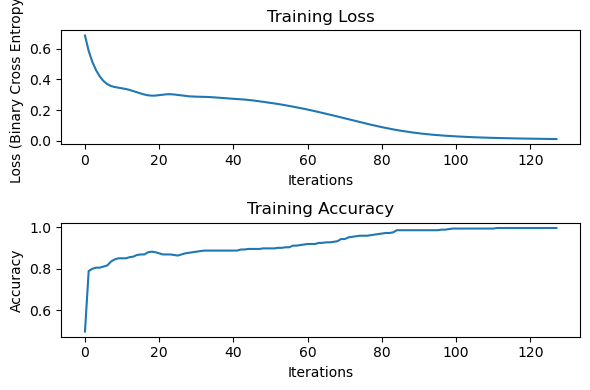

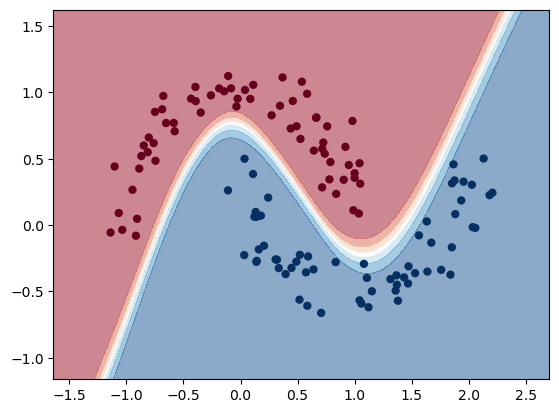

In [64]:
# Option 2: Change the activation function (TanH instead of ReLU)
net_2 = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.Tanh(),
    nn.Linear(32, 32),
    nn.Tanh(),
    nn.Linear(32, 1),
    nn.Sigmoid(),
)

optimizer_2 = optim.Adam(net_2.parameters(), lr=0.01)

train_loss_2, train_acc_2 = train_model(net_2, optimizer_2)
plot_training_metrics(train_loss_2, train_acc_2)
fig_2 = plot_decision_boundary(X_test, Y_test, net_2, cmap = 'RdBu')

**Observation:** using Tanh as activation fuction
- Training loss and accuracy:
    - Loss decreases steadily but more slowly compared to the ReLU-based models.
    - Accuracy improves gradually, reaching near 100% but training is slightly less efficient (after around 110 iterations).
    - Training is slightly less stable initially, with small fluctuations in the loss curve.
- Decision boundary:
    - The boundary is smoother and more curved than the ReLU-based models
    - The transition region is more gradual compared to the sharper ReLU decision boundaries.
    - Tanh provides a more flexible and continuous decision boundary
- risk of vanishing gradient if the depth is increased

#### Model 3: Increase learning rate

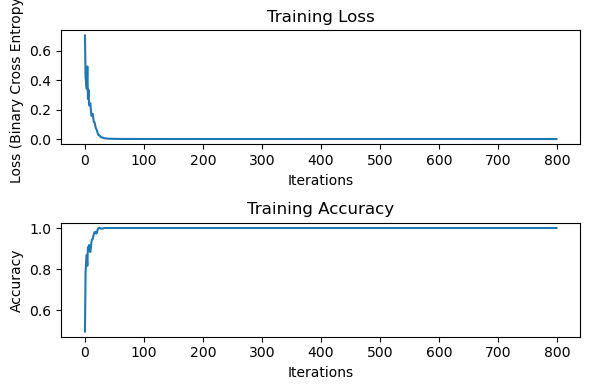

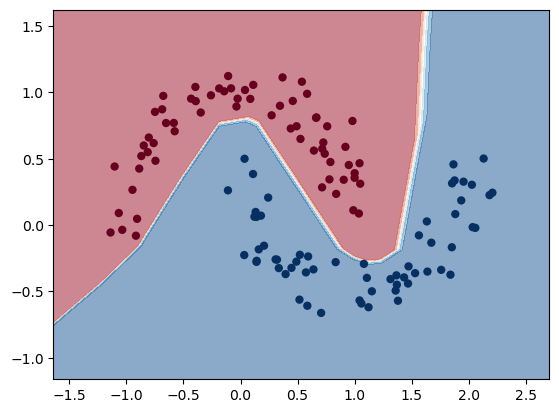

In [65]:
# Model 3: Change the learning rate (0.1 instead of 0.01)
net_3 = nn.Sequential(
    nn.Linear(X.shape[-1], 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid(),
)

optimizer_3 = optim.Adam(net_3.parameters(), lr=0.1)

train_loss_3, train_acc_3 = train_model(net_3, optimizer_3, iters=800)
plot_training_metrics(train_loss_3, train_acc_3)
fig_3 = plot_decision_boundary(X_test, Y_test, net_3, cmap = 'RdBu')

> your discussion

**Observation:** Increased learning rate model
- Training loss and accuracy:
    - The model converges much faster, it needs few iterations to have satistying loss and accuracy
    - We assume this is the case due to the low complexity of the output we want to predict

## Feedback

We will now ask you a few questions to improve the content of this homework for next years.

<span style="color:blue">How long did you spend on this homework?</span>

6 hours

<span style="color:blue">Did you learn something?</span>

Yes. We understood how to use PyTorch for tensor operations, gradient descent, and training neural networks 

<span style="color:blue">Do you now feel comfortable with writing simple mathematical operations (like you would do in matlab or with numpy) in PyTorch?</span>

Yes. PyTorch’s tensor operations are very similar to NumPy, making it easy to manipulate data

<span style="color:blue">Do you now feel comfortable using PyTorch for performing gradient descent?</span>

Yes. We now understand autograd, backward propagation, and optimizers like Adam and SGD in PyTorch.

<span style="color:blue">Do you now feel comfortable with building and learning neural networks with PyTorch?</span>

Yes. We can define models using `nn.Module` and `nn.Sequential`, choose appropriate activation functions, and optimize models using `torch.optim`